In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn')

In [2]:
df = pd.read_csv("Pasion et al dataset.csv")
df.sample(10)

Location      Date  Time  Latitude  Longitude  Altitude  \
10077   March AFB  20171126  1500     33.90    -117.26       458   
2173      Grissom  20180724  1100     40.67     -86.15       239   
5926         JDMT  20171204  1500     26.98     -80.11         2   
18376      Travis  20180902  1100     38.16    -121.56         1   
12076       MNANG  20180905  1000     44.89     -93.20       246   
6966      Kahului  20180104  1400     20.89    -156.44         2   
18374      Travis  20180901  1500     38.16    -121.56         1   
9678    March AFB  20170921  1000     33.90    -117.26       458   
13024      Offutt  20180914  1400     41.13     -95.75       380   
4249   Hill Weber  20180519  1000     41.15    -111.99      1370   

         YRMODAHRMI  Month  Hour  Season  Humidity  AmbientTemp   PolyPwr  \
10077  2.017110e+11     11    15    Fall  24.60938     29.11339   8.23192   
2173   2.018070e+11      7    11  Summer  64.84985     29.10332   2.48882   
5926   2.017120e+11     12    15  Winter  35.82764     38.71338  17.96034   
18376  2.018090e+11      9    11    Fall  37.60376     31.63109  11.79780   
12076  2.018090e+11      9    10    Fall  79.33350     18.70270   1.75940   
6966   2.018010e+11      1    14  Winter  53.01514     27.05391  16.92037   
18374  2.018090e+11      9    15    Fall  30.14526     35.44289  13.71369   
9678   2.017090e+11      9    10    Fall  48.96851     24.60922   4.27320   
13024  2.018090e+11      9    14    Fall  43.62793     38.76122  18.79471   
4249   2.018050e+11      5    10  Spring  41.55273     23.23456  19.13467   

       Wind.Speed  Visibility  Pressure  Cloud.Ceiling  
10077           7        10.0     961.1            722  
2173            8        10.0     986.5             26  
5926           11        10.0    1019.3            722  
18376           7        10.0    1006.9            722  
12076          16        10.0     991.5            160  
6966           20        10.0    1017.5            722  
18374          16        10.0    1005.9            722  
9678           10        10.0     957.2             60  
13024           9        10.0     978.4            722  
4249            9        10.0     852.5            722

In [3]:
df.columns

Index(['Location', 'Date', 'Time', 'Latitude', 'Longitude', 'Altitude',
       'YRMODAHRMI', 'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp',
       'PolyPwr', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling'],
      dtype='object')

In [4]:
df.describe()

Date          Time      Latitude     Longitude      Altitude  \
count  2.104500e+04  21045.000000  21045.000000  21045.000000  21045.000000   
mean   2.017720e+07   1267.483725     38.213823   -108.593678    798.843668   
std    4.579585e+03    167.602767      6.323761     16.364130    770.681794   
min    2.017052e+07   1000.000000     20.890000   -156.440000      1.000000   
25%    2.017111e+07   1100.000000     38.160000   -117.260000      2.000000   
50%    2.018032e+07   1300.000000     38.950000   -111.180000    458.000000   
75%    2.018062e+07   1400.000000     41.150000   -104.710000   1370.000000   
max    2.018100e+07   1545.000000     47.520000    -80.110000   1947.000000   

         YRMODAHRMI         Month          Hour      Humidity   AmbientTemp  \
count  2.104500e+04  21045.000000  21045.000000  21045.000000  21045.000000   
mean   2.017718e+11      6.565883     12.627845     37.121941     29.285117   
std    4.579846e+07      2.983958      1.672952     23.823011     12.366820   
min    2.017050e+11      1.000000     10.000000      0.000000    -19.981770   
25%    2.017110e+11      4.000000     11.000000     17.529300     21.915280   
50%    2.018030e+11      7.000000     13.000000     33.123780     30.289150   
75%    2.018060e+11      9.000000     14.000000     52.593990     37.474670   
max    2.018100e+11     12.000000     15.000000     99.987790     65.738370   

            PolyPwr    Wind.Speed    Visibility      Pressure  Cloud.Ceiling  
count  21045.000000  21045.000000  21045.000000  21045.000000   21045.000000  
mean      12.978583     10.318318      9.700071    925.944747     515.966785  
std        7.123255      6.385030      1.351949     85.215659     301.903379  
min        0.257330      0.000000      0.000000    781.700000       0.000000  
25%        6.404570      6.000000     10.000000    845.500000     140.000000  
50%       13.798700      9.000000     10.000000    961.100000     722.000000  
75%       18.863650     14.000000     10.000000   1008.900000     722.000000  
max       34.285020     49.000000     10.000000   1029.500000     722.000000

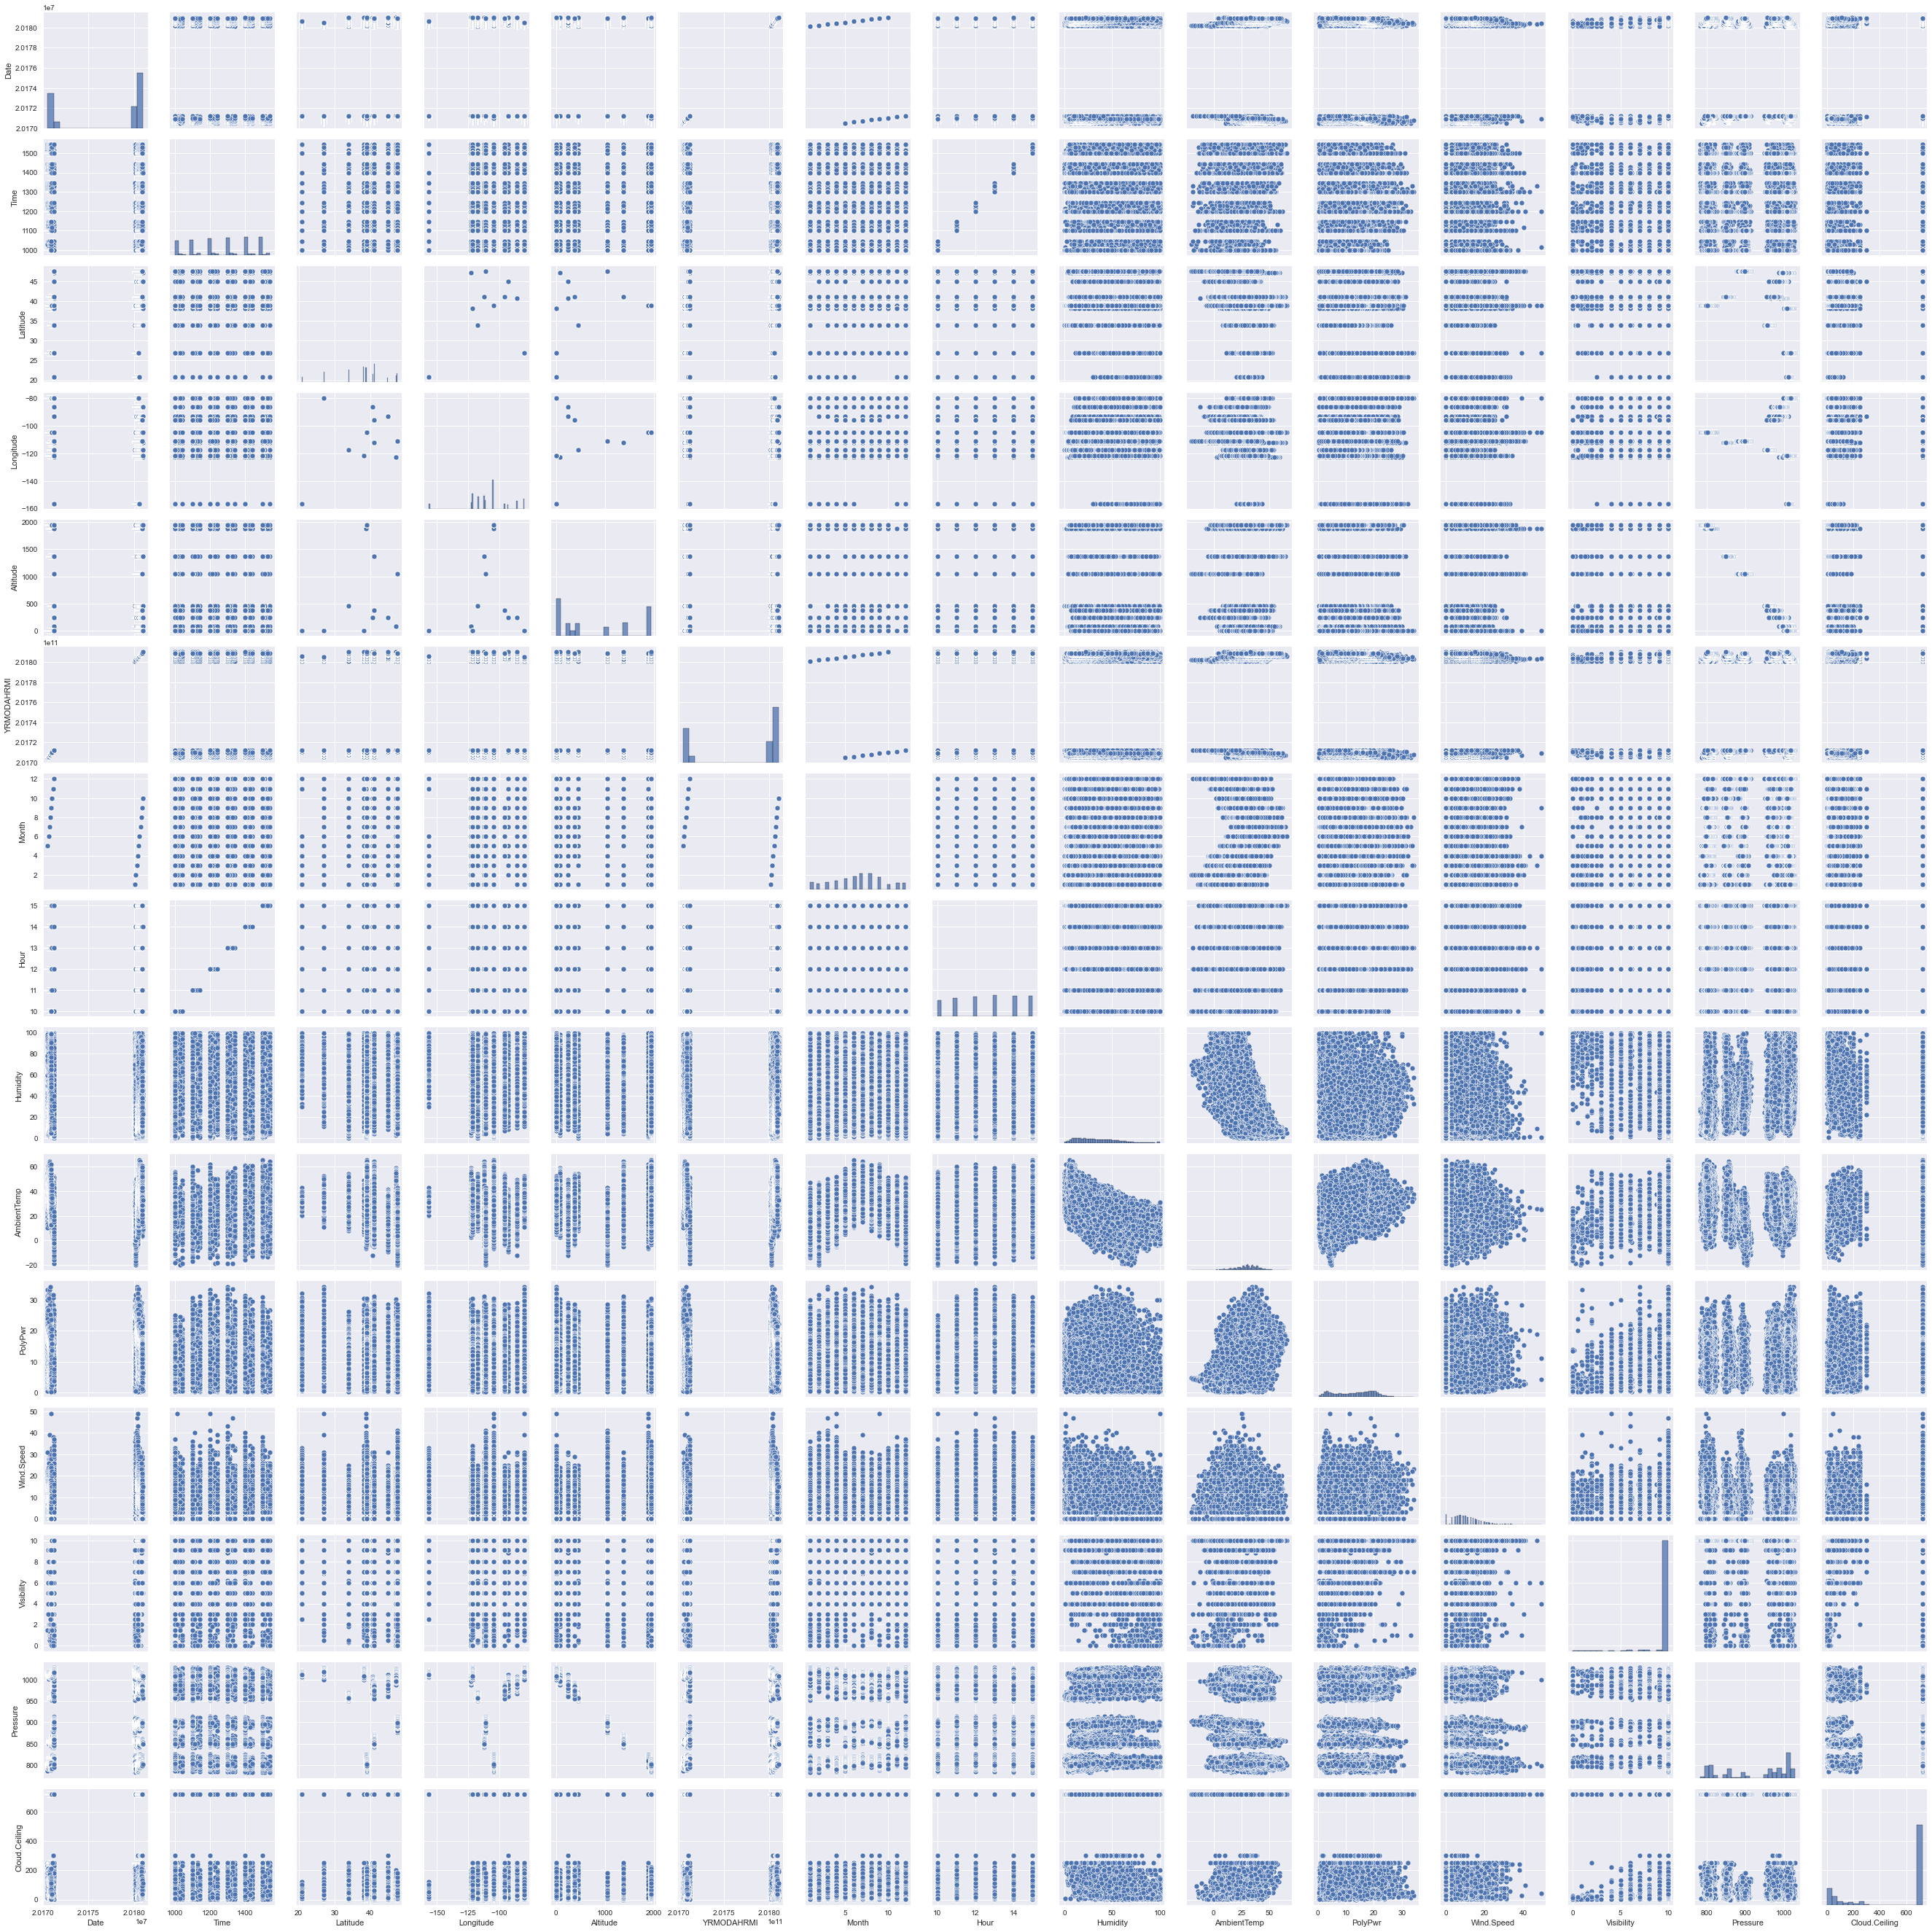

In [6]:
sns.pairplot(df)

In [5]:
df_corr = df[['Location', 'Time', 'Latitude', 'Longitude', 'Altitude',
              'YRMODAHRMI', 'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp',
              'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling', 'PolyPwr']].corr()

In [6]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

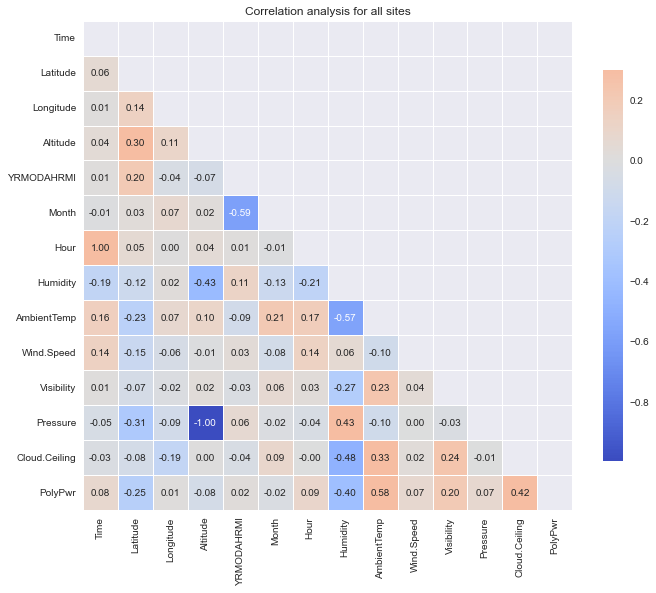

In [7]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr, mask=mask, cmap='coolwarm', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation analysis for all sites')
plt.show()


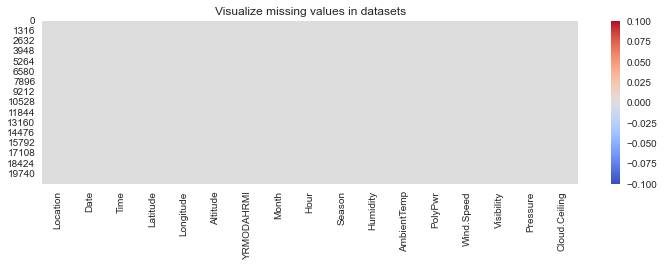

In [8]:
plt.figure(figsize=(12, 3))
sns.heatmap(df.isnull(), cmap='coolwarm');
plt.title('Visualize missing values in datasets');

count    21045.000000
mean        12.627845
std          1.672952
min         10.000000
25%         11.000000
50%         13.000000
75%         14.000000
max         15.000000
Name: Hour, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_1392\2519084757.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.Hour)


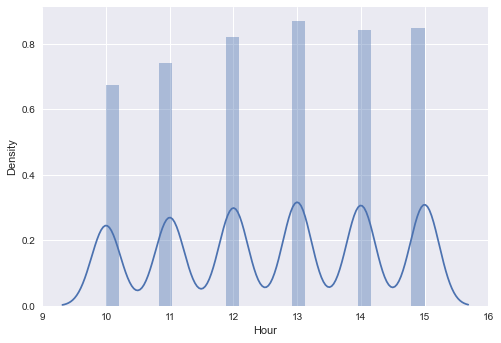

In [9]:
print(df.Hour.describe())
ax = sns.distplot(df.Hour)

count    21045.000000
mean        12.978583
std          7.123255
min          0.257330
25%          6.404570
50%         13.798700
75%         18.863650
max         34.285020
Name: PolyPwr, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_1392\1873856200.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.PolyPwr)


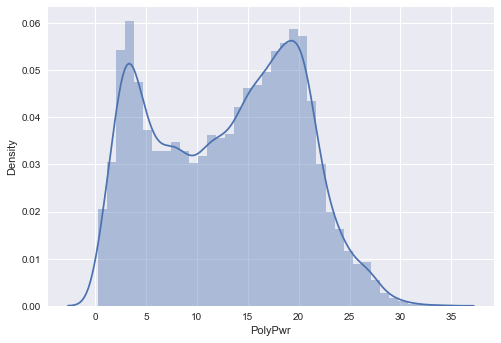

In [12]:
print(df.PolyPwr.describe())
ax = sns.distplot(df.PolyPwr)

In [6]:
df_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)
df_loc_season_en = pd.get_dummies(df_location_en, columns=['Season'], drop_first=True)
df_loc_season_en.sample(10)

Date  Time  Latitude  Longitude  Altitude    YRMODAHRMI  Month  \
12731  20180709  1400     41.13     -95.75       380  2.018070e+11      7   
1644   20180514  1500     40.67     -86.15       239  2.018050e+11      5   
15723  20180927  1300     38.82    -104.71      1879  2.018090e+11      9   
5337   20170724  1300     26.98     -80.11         2  2.017070e+11      7   
18981  20170730  1000     38.95    -104.83      1947  2.017070e+11      7   
9049   20180809  1400     47.52    -111.18      1043  2.018080e+11      8   
11787  20180713  1500     44.89     -93.20       246  2.018070e+11      7   
18183  20180729  1500     38.16    -121.56         1  2.018070e+11      7   
9502   20170823  1200     33.90    -117.26       458  2.017080e+11      8   
16703  20171123  1200     38.16    -121.56         1  2.017110e+11     11   

       Hour  Humidity  AmbientTemp  ...  Location_MNANG  Location_Malmstrom  \
12731    14  34.17358     40.64697  ...               0                   0   
1644     15  37.73193     34.86382  ...               0                   0   
15723    13   2.69165     43.26790  ...               0                   0   
5337     13  50.54932     38.73100  ...               0                   0   
18981    10  73.42529     24.54880  ...               0                   0   
9049     14  11.99341     38.13179  ...               0                   1   
11787    15  69.75708     27.69592  ...               1                   0   
18183    15  30.37109     35.45296  ...               0                   0   
9502     12  42.85889     31.57822  ...               0                   0   
16703    12  76.12915     19.99680  ...               0                   0   

       Location_March AFB  Location_Offutt  Location_Peterson  \
12731                   0                1                  0   
1644                    0                0                  0   
15723                   0                0                  1   
5337                    0                0                  0   
18981                   0                0                  0   
9049                    0                0                  0   
11787                   0                0                  0   
18183                   0                0                  0   
9502                    1                0                  0   
16703                   0                0                  0   

       Location_Travis  Location_USAFA  Season_Spring  Season_Summer  \
12731                0               0              0              1   
1644                 0               0              1              0   
15723                0               0              0              0   
5337                 0               0              0              1   
18981                0               1              0              1   
9049                 0               0              0              1   
11787                0               0              0              1   
18183                1               0              0              1   
9502                 0               0              0              1   
16703                1               0              0              0   

       Season_Winter  
12731              0  
1644               0  
15723              0  
5337               0  
18981              0  
9049               0  
11787              0  
18183              0  
9502               0  
16703              0  

[10 rows x 29 columns]

In [27]:
df_loc_season_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21045 non-null  int64  
 1   Time                 21045 non-null  int64  
 2   Latitude             21045 non-null  float64
 3   Longitude            21045 non-null  float64
 4   Altitude             21045 non-null  int64  
 5   YRMODAHRMI           21045 non-null  float64
 6   Month                21045 non-null  int64  
 7   Hour                 21045 non-null  int64  
 8   Humidity             21045 non-null  float64
 9   AmbientTemp          21045 non-null  float64
 10  PolyPwr              21045 non-null  float64
 11  Wind.Speed           21045 non-null  int64  
 12  Visibility           21045 non-null  float64
 13  Pressure             21045 non-null  float64
 14  Cloud.Ceiling        21045 non-null  int64  
 15  Location_Grissom     21045 non-null 

In [ ]:
for x in df['Hour']:
    print(x)

In [25]:
df_loc_season_en['delta_hr']= df_loc_season_en.Hour - min(df.Hour)
df_loc_season_en['sine_mon']= np.sin(2*(df_loc_season_en.Month - 1)*np.pi/11)
df_loc_season_en['cos_mon']= np.cos(2*(df_loc_season_en.Month - 1)*np.pi/11)
df_loc_season_en['sine_hr']= np.sin(2*(df_loc_season_en.delta_hr*np.pi/(max(df.Hour) - min(df.Hour))))
df_loc_season_en['cos_hr']= np.cos(2*(df_loc_season_en.delta_hr*np.pi/(max(df.Hour) - min(df.Hour))))

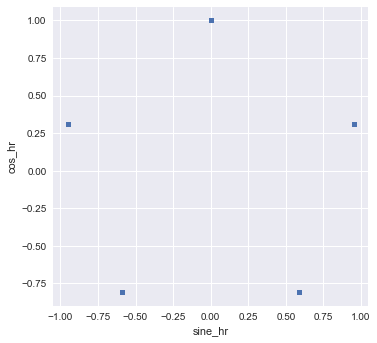

In [26]:
ax = df_loc_season_en.plot.scatter('sine_hr', 'cos_hr').set_aspect('equal')

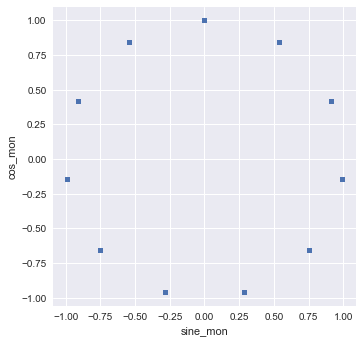

In [10]:
ax = df_loc_season_en.plot.scatter('sine_mon', 'cos_mon').set_aspect('equal')

In [11]:
select= ['Latitude', 'Humidity', 'AmbientTemp', 'PolyPwr', 'Wind.Speed',
                     'Visibility', 'Pressure', 'Cloud.Ceiling', 
                     'Season_Spring', 'Season_Summer', 'Season_Winter',
                     'sine_mon', 'cos_mon', 'sine_hr', 'cos_hr']

In [12]:
df_select = df_loc_season_en[select].reset_index(drop=True)
df_select

Latitude  Humidity  AmbientTemp   PolyPwr  Wind.Speed  Visibility  \
0         47.11  81.71997     12.86919   2.42769           5        10.0   
1         47.11  96.64917      9.66415   2.46273           0        10.0   
2         47.11  93.61572     15.44983   4.46836           5        10.0   
3         47.11  77.21558     10.36659   1.65364           5         2.0   
4         47.11  54.80347     16.85471   6.57939           3         3.0   
...         ...       ...          ...       ...         ...         ...   
21040     38.95  11.66992     43.22510   9.79611          14        10.0   
21041     38.95  18.22510     28.98247  10.88992          13        10.0   
21042     38.95  15.52124     33.49167   8.24479          10        10.0   
21043     38.95   6.63452     51.62163  12.47328          10        10.0   
21044     38.95  22.58301     32.83958   6.39732          15        10.0   

       Pressure  Cloud.Ceiling  Season_Spring  Season_Summer  Season_Winter  \
0        1010.6            722              0              0              1   
1        1011.3             23              0              0              1   
2        1011.6             32              0              0              1   
3        1024.4              6              0              0              1   
4        1023.7              9              0              0              1   
...         ...            ...            ...            ...            ...   
21040     802.3            722              0              0              0   
21041     799.2            722              0              0              0   
21042     798.4            722              0              0              0   
21043     797.8            722              0              0              0   
21044     801.2            110              0              0              0   

           sine_mon   cos_mon       sine_hr    cos_hr  
0     -1.133108e-15  1.000000  9.510565e-01  0.309017  
1     -1.133108e-15  1.000000 -5.877853e-01 -0.809017  
2     -1.133108e-15  1.000000 -5.877853e-01 -0.809017  
3     -1.133108e-15  1.000000  5.877853e-01 -0.809017  
4     -1.133108e-15  1.000000 -9.510565e-01  0.309017  
...             ...       ...           ...       ...  
21040 -9.898214e-01 -0.142315 -2.449294e-16  1.000000  
21041 -9.898214e-01 -0.142315 -5.877853e-01 -0.809017  
21042 -9.898214e-01 -0.142315 -9.510565e-01  0.309017  
21043 -9.898214e-01 -0.142315 -2.449294e-16  1.000000  
21044 -9.096320e-01  0.415415 -9.510565e-01  0.309017  

[21045 rows x 15 columns]

In [13]:
target_label = 'PolyPwr'
features = list(set(select).difference(set([target_label])))
features

['Wind.Speed',
 'Humidity',
 'Pressure',
 'Season_Winter',
 'Season_Summer',
 'Cloud.Ceiling',
 'cos_mon',
 'sine_hr',
 'AmbientTemp',
 'Latitude',
 'Visibility',
 'sine_mon',
 'cos_hr',
 'Season_Spring']

Split Train and Test Dataset

In [14]:
import optuna
import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
X = df_select[features].reset_index(drop=True)
y = df_select[target_label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Gradient Boosting (Lightgbm)

In [16]:
n_estimators_list = [int(50*x) for x in range(2, 30)]

learning_rate_list = [round(x/500, 4) for x in range(2, 25)]

max_depth_list = [int(x) for x in range(3, 13)]
max_depth_list.append(-1)

n_leaves_list = [int(50*x) for x in range(2, 30)]

feature_fraction_list = [x/10 for x in range(1, 10)]

objective_list = ['rmse', 'mae', 'mape'] 

In [17]:
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', n_estimators_list),
        'learning_rate': trial.suggest_categorical('learning_rate', learning_rate_list),
        'max_depth': trial.suggest_categorical('max_depth', max_depth_list),
        'num_leaves': trial.suggest_categorical('num_leaves', n_leaves_list),
        'feature_fraction': trial.suggest_categorical('feature_fraction', feature_fraction_list),
        'objective': trial.suggest_categorical('objective', objective_list),
        'random_state': 42
    }

    # Train the LightGBM model with the hyperparameters
    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the evaluation metric (RMSE in this case)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=100)

[I 2023-07-17 13:49:06,359] A new study created in memory with name: no-name-3eb20e9f-8040-4c68-9259-e86a743d34c1


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 13.812220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:49:15,563] Trial 0 finished with value: 4.114727890472018 and parameters: {'n_estimators': 1400, 'learning_rate': 0.004, 'max_depth': 10, 'num_leaves': 400, 'feature_fraction': 0.5, 'objective': 'mae'}. Best is trial 0 with value: 4.114727890472018.


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 13.812220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2023-07-17 13:49:16,756] Trial 1 finished with value: 4.368670831682293 and parameters: {'n_estimators': 300, 'learning_rate': 0.016, 'max_depth': 9, 'num_leaves': 850, 'feature_fraction': 0.2, 'objective': 'mae'}. Best is trial 0 with value: 4.114727890472018.


[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 13.812220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2023-07-17 13:49:17,845] Trial 2 finished with value: 4.3122764547890124 and parameters: {'n_estimators': 1300, 'learning_rate': 0.016, 'max_depth': 4, 'num_leaves': 1200, 'feature_fraction': 0.3, 'objective': 'mae'}. Best is trial 0 with value: 4.114727890472018.


[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:49:19,686] Trial 3 finished with value: 4.089235802346065 and parameters: {'n_estimators': 450, 'learning_rate': 0.038, 'max_depth': 8, 'num_leaves': 1050, 'feature_fraction': 0.5, 'objective': 'rmse'}. Best is trial 3 with value: 4.089235802346065.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Some label values are < 1 in absolute value. MAPE is unstable with such values, so LightGBM rounds them to 1.0 when calculating MAPE.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 3.976460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2023-07-17 13:49:28,053] Trial 4 finished with value: 4.927824216218534 and parameters: {'n_estimators': 1350, 'learning_rate': 0.046, 'max_depth': 8, 'num_leaves': 1350, 'feature_fraction': 0.4, 'objective': 'mape'}. Best is trial 3 with value: 4.089235802346065.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 13.812220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:49:30,192] Trial 5 finished with value: 4.174882371110018 and parameters: {'n_estimators': 600, 'learning_rate': 0.02, 'max_depth': 7, 'num_leaves': 200, 'feature_fraction': 0.6, 'objective': 'mae'}. Best is trial 3 with value: 4.089235802346065.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 13.812220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:49:35,421] Trial 6 finished with value: 4.122192267286865 and parameters: {'n_estimators': 1100, 'learning_rate': 0.04, 'max_depth': 9, 'num_leaves': 650, 'feature_fraction': 0.6, 'objective': 'mae'}. Best is trial 3 with value: 4.089235802346065.


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] Some label values are < 1 in absolute value. MAPE is unstable with such values, so LightGBM rounds them to 1.0 when calculating MAPE.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 3.976460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2023-07-17 13:49:39,563] Trial 7 finished with value: 4.938659709452305 and parameters: {'n_estimators': 700, 'learning_rate': 0.044, 'max_depth': 12, 'num_leaves': 850, 'feature_fraction': 0.2, 'objective': 'mape'}. Best is trial 3 with value: 4.089235802346065.


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:49:57,114] Trial 8 finished with value: 4.146779749222396 and parameters: {'n_estimators': 650, 'learning_rate': 0.022, 'max_depth': -1, 'num_leaves': 650, 'feature_fraction': 0.7, 'objective': 'rmse'}. Best is trial 3 with value: 4.089235802346065.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] Some label values are < 1 in absolute value. MAPE is unstable with such values, so LightGBM rounds them to 1.0 when calculating MAPE.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 3.976460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2023-07-17 13:50:01,189] Trial 9 finished with value: 5.285288728087878 and parameters: {'n_estimators': 950, 'learning_rate': 0.008, 'max_depth': 6, 'num_leaves': 550, 'feature_fraction': 0.7, 'objective': 'mape'}. Best is trial 3 with value: 4.089235802346065.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:50:02,365] Trial 10 finished with value: 4.098651476346068 and parameters: {'n_estimators': 450, 'learning_rate': 0.038, 'max_depth': 8, 'num_leaves': 1050, 'feature_fraction': 0.9, 'objective': 'rmse'}. Best is trial 3 with value: 4.089235802346065.


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:50:03,533] Trial 11 finished with value: 4.098651476346068 and parameters: {'n_estimators': 450, 'learning_rate': 0.038, 'max_depth': 8, 'num_leaves': 1050, 'feature_fraction': 0.9, 'objective': 'rmse'}. Best is trial 3 with value: 4.089235802346065.


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:50:04,022] Trial 12 finished with value: 4.140218848882901 and parameters: {'n_estimators': 450, 'learning_rate': 0.038, 'max_depth': 5, 'num_leaves': 1050, 'feature_fraction': 0.5, 'objective': 'rmse'}. Best is trial 3 with value: 4.089235802346065.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-17 13:50:05,305] Trial 13 finished with value: 4.0810931978343135 and parameters: {'n_estimators': 450, 'learning_rate': 0.028, 'max_depth': 8, 'num_leaves': 1050, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 13 with value: 4.0810931978343135.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:50:06,835] Trial 14 finished with value: 4.065996034115947 and parameters: {'n_estimators': 200, 'learning_rate': 0.028, 'max_depth': 11, 'num_leaves': 950, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 14 with value: 4.065996034115947.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:50:10,793] Trial 15 finished with value: 4.097625067566669 and parameters: {'n_estimators': 900, 'learning_rate': 0.028, 'max_depth': 11, 'num_leaves': 950, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 14 with value: 4.065996034115947.
[I 2023-07-17 13:50:10,929] Trial 16 finished with value: 4.426544116228698 and parameters: {'n_estimators': 200, 'learning_rate': 0.028, 'max_depth': 3, 'num_leaves': 950, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 14 with value: 4.065996034115947.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.

[I 2023-07-17 13:50:12,746] Trial 17 finished with value: 4.065996034115947 and parameters: {'n_estimators': 200, 'learning_rate': 0.028, 'max_depth': 11, 'num_leaves': 1250, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 14 with value: 4.065996034115947.


[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2023-07-17 13:50:13,195] Trial 18 finished with value: 5.542290021790774 and parameters: {'n_estimators': 200, 'learning_rate': 0.018, 'max_depth': 11, 'num_leaves': 1000, 'feature_fraction': 0.1, 'objective': 'rmse'}. Best is trial 14 with value: 4.065996034115947.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-17 13:50:15,550] Trial 19 finished with value: 4.059774972909545 and parameters: {'n_estimators': 350, 'learning_rate': 0.024, 'max_depth': 11, 'num_leaves': 1250, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Some label values are < 1 in absolute value. MAPE is unstable with such values, so LightGBM rounds them to 1.0 when calculating MAPE.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 3.976460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-07-17 13:50:18,273] Trial 20 finished with value: 4.949050662035923 and parameters: {'n_estimators': 350, 'learning_rate': 0.024, 'max_depth': 11, 'num_leaves': 1250, 'feature_fraction': 0.8, 'objective': 'mape'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2023-07-17 13:50:23,536] Trial 21 finished with value: 4.143415470748984 and parameters: {'n_estimators': 1000, 'learning_rate': 0.042, 'max_depth': 11, 'num_leaves': 1250, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:50:25,244] Trial 22 finished with value: 4.071194055338544 and parameters: {'n_estimators': 200, 'learning_rate': 0.036, 'max_depth': 11, 'num_leaves': 1250, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:50:26,805] Trial 23 finished with value: 4.073331231205984 and parameters: {'n_estimators': 400, 'learning_rate': 0.024, 'max_depth': 11, 'num_leaves': 150, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2023-07-17 13:50:28,593] Trial 24 finished with value: 4.621760618358306 and parameters: {'n_estimators': 1250, 'learning_rate': 0.032, 'max_depth': 11, 'num_leaves': 100, 'feature_fraction': 0.1, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:50:29,987] Trial 25 finished with value: 4.160763951936807 and parameters: {'n_estimators': 500, 'learning_rate': 0.01, 'max_depth': 7, 'num_leaves': 1400, 'feature_fraction': 0.4, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2023-07-17 13:50:30,780] Trial 26 finished with value: 4.461204842365321 and parameters: {'n_estimators': 1050, 'learning_rate': 0.006, 'max_depth': 4, 'num_leaves': 250, 'feature_fraction': 0.3, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:50:32,549] Trial 27 finished with value: 4.093498872579352 and parameters: {'n_estimators': 1150, 'learning_rate': 0.03, 'max_depth': 6, 'num_leaves': 1150, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Some label values are < 1 in absolute value. MAPE is unstable with such values, so LightGBM rounds them to 1.0 when calculating MAPE.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 3.976460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2023-07-17 13:50:34,334] Trial 28 finished with value: 5.040825988408993 and parameters: {'n_estimators': 250, 'learning_rate': 0.026, 'max_depth': 10, 'num_leaves': 600, 'feature_fraction': 0.8, 'objective': 'mape'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


[I 2023-07-17 13:50:51,682] Trial 29 finished with value: 4.144635216714848 and parameters: {'n_estimators': 1450, 'learning_rate': 0.014, 'max_depth': -1, 'num_leaves': 450, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 13.812220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:50:57,737] Trial 30 finished with value: 4.099967582558566 and parameters: {'n_estimators': 800, 'learning_rate': 0.012, 'max_depth': 12, 'num_leaves': 300, 'feature_fraction': 0.8, 'objective': 'mae'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:51:00,883] Trial 31 finished with value: 4.956076686679762 and parameters: {'n_estimators': 200, 'learning_rate': 0.004, 'max_depth': 11, 'num_leaves': 1250, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:51:02,324] Trial 32 finished with value: 4.071453070217833 and parameters: {'n_estimators': 150, 'learning_rate': 0.036, 'max_depth': 11, 'num_leaves': 700, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2023-07-17 13:51:03,387] Trial 33 finished with value: 4.385381620079959 and parameters: {'n_estimators': 100, 'learning_rate': 0.048, 'max_depth': 11, 'num_leaves': 1100, 'feature_fraction': 0.2, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.9

[I 2023-07-17 13:51:04,044] Trial 34 finished with value: 4.254891231855919 and parameters: {'n_estimators': 1200, 'learning_rate': 0.034, 'max_depth': 3, 'num_leaves': 900, 'feature_fraction': 0.3, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-17 13:51:05,278] Trial 35 finished with value: 4.232566871178419 and parameters: {'n_estimators': 850, 'learning_rate': 0.036, 'max_depth': 5, 'num_leaves': 350, 'feature_fraction': 0.5, 'objective': 'mae'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:51:08,316] Trial 36 finished with value: 4.092924235920204 and parameters: {'n_estimators': 550, 'learning_rate': 0.028, 'max_depth': 10, 'num_leaves': 750, 'feature_fraction': 0.4, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 13.812220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:51:11,761] Trial 37 finished with value: 4.111017608441187 and parameters: {'n_estimators': 750, 'learning_rate': 0.016, 'max_depth': 9, 'num_leaves': 500, 'feature_fraction': 0.6, 'objective': 'mae'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:51:18,510] Trial 38 finished with value: 4.151295904178879 and parameters: {'n_estimators': 1400, 'learning_rate': 0.036, 'max_depth': 11, 'num_leaves': 1300, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] Some label values are < 1 in absolute value. MAPE is unstable with such values, so LightGBM rounds them to 1.0 when calculating MAPE.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 3.976460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2023-07-17 13:51:21,612] Trial 39 finished with value: 4.932703298758991 and parameters: {'n_estimators': 350, 'learning_rate': 0.046, 'max_depth': 11, 'num_leaves': 1450, 'feature_fraction': 0.7, 'objective': 'mape'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2023-07-17 13:51:21,869] Trial 40 finished with value: 4.553862319935123 and parameters: {'n_estimators': 200, 'learning_rate': 0.024, 'max_depth': 4, 'num_leaves': 800, 'feature_fraction': 0.2, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-17 13:51:23,270] Trial 41 finished with value: 4.071453070217833 and parameters: {'n_estimators': 150, 'learning_rate': 0.036, 'max_depth': 11, 'num_leaves': 700, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-ch

[I 2023-07-17 13:51:24,750] Trial 42 finished with value: 4.090720867144285 and parameters: {'n_estimators': 150, 'learning_rate': 0.02, 'max_depth': 11, 'num_leaves': 400, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:51:27,676] Trial 43 finished with value: 4.063950239461033 and parameters: {'n_estimators': 300, 'learning_rate': 0.022, 'max_depth': 11, 'num_leaves': 1250, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:51:28,744] Trial 44 finished with value: 4.114110723618069 and parameters: {'n_estimators': 300, 'learning_rate': 0.022, 'max_depth': 7, 'num_leaves': 1250, 'feature_fraction': 0.9, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-17 13:51:30,799] Trial 45 finished with value: 4.1207822282689 and parameters: {'n_estimators': 300, 'learning_rate': 0.022, 'max_depth': 9, 'num_leaves': 1250, 'feature_fraction': 0.6, 'objective': 'mae'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2023-07-17 13:51:38,864] Trial 46 finished with value: 4.1705417823088995 and parameters: {'n_estimators': 1300, 'learning_rate': 0.044, 'max_depth': 12, 'num_leaves': 1200, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:51:42,641] Trial 47 finished with value: 4.1161809574249 and parameters: {'n_estimators': 600, 'learning_rate': 0.04, 'max_depth': 11, 'num_leaves': 1350, 'feature_fraction': 0.5, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] Some label values are < 1 in absolute value. MAPE is unstable with such values, so LightGBM rounds them to 1.0 when calculating MAPE.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 3.976460


[I 2023-07-17 13:51:44,463] Trial 48 finished with value: 4.995806895561064 and parameters: {'n_estimators': 200, 'learning_rate': 0.028, 'max_depth': -1, 'num_leaves': 200, 'feature_fraction': 0.7, 'objective': 'mape'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2023-07-17 13:51:45,782] Trial 49 finished with value: 4.797677634491936 and parameters: {'n_estimators': 1350, 'learning_rate': 0.008, 'max_depth': 5, 'num_leaves': 1250, 'feature_fraction': 0.1, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:51:47,810] Trial 50 finished with value: 4.087252163604608 and parameters: {'n_estimators': 1100, 'learning_rate': 0.022, 'max_depth': 6, 'num_leaves': 850, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2023-07-17 13:51:51,450] Trial 51 finished with value: 4.1027913567877805 and parameters: {'n_estimators': 700, 'learning_rate': 0.036, 'max_depth': 11, 'num_leaves': 700, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2023-07-17 13:51:56,509] Trial 52 finished with value: 4.061104650413262 and parameters: {'n_estimators': 650, 'learning_rate': 0.018, 'max_depth': 11, 'num_leaves': 950, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2023-07-17 13:52:01,205] Trial 53 finished with value: 4.061104650413262 and parameters: {'n_estimators': 650, 'learning_rate': 0.018, 'max_depth': 11, 'num_leaves': 950, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:52:07,122] Trial 54 finished with value: 4.0776133146997555 and parameters: {'n_estimators': 950, 'learning_rate': 0.018, 'max_depth': 11, 'num_leaves': 950, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:52:10,325] Trial 55 finished with value: 4.076874048328847 and parameters: {'n_estimators': 350, 'learning_rate': 0.018, 'max_depth': 11, 'num_leaves': 950, 'feature_fraction': 0.9, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:52:10,806] Trial 56 finished with value: 4.252435716857803 and parameters: {'n_estimators': 650, 'learning_rate': 0.028, 'max_depth': 3, 'num_leaves': 950, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-17 13:52:16,187] Trial 57 finished with value: 4.196842534009708 and parameters: {'n_estimators': 650, 'learning_rate': 0.018, 'max_depth': 11, 'num_leaves': 950, 'feature_fraction': 0.3, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Some label values are < 1 in absolute value. MAPE is unstable with such values, so LightGBM rounds them to 1.0 when calculating MAPE.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 3.976460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-07-17 13:52:19,751] Trial 58 finished with value: 5.108298060944964 and parameters: {'n_estimators': 650, 'learning_rate': 0.018, 'max_depth': 8, 'num_leaves': 550, 'feature_fraction': 0.4, 'objective': 'mape'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:52:23,325] Trial 59 finished with value: 4.112382839798843 and parameters: {'n_estimators': 650, 'learning_rate': 0.042, 'max_depth': 11, 'num_leaves': 1000, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 13.812220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:52:27,548] Trial 60 finished with value: 4.093095638310827 and parameters: {'n_estimators': 900, 'learning_rate': 0.032, 'max_depth': 10, 'num_leaves': 650, 'feature_fraction': 0.8, 'objective': 'mae'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:52:30,358] Trial 61 finished with value: 4.186193789311386 and parameters: {'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 11, 'num_leaves': 1250, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827


[I 2023-07-17 13:52:31,388] Trial 62 finished with value: 4.600142801988605 and parameters: {'n_estimators': 200, 'learning_rate': 0.006, 'max_depth': 11, 'num_leaves': 150, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:52:37,048] Trial 63 finished with value: 4.088789616174861 and parameters: {'n_estimators': 1000, 'learning_rate': 0.024, 'max_depth': 11, 'num_leaves': 1250, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:52:38,340] Trial 64 finished with value: 4.169916615980488 and parameters: {'n_estimators': 1250, 'learning_rate': 0.014, 'max_depth': 4, 'num_leaves': 950, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2023-07-17 13:52:38,850] Trial 65 finished with value: 4.824487724803369 and parameters: {'n_estimators': 400, 'learning_rate': 0.026, 'max_depth': 7, 'num_leaves': 100, 'feature_fraction': 0.1, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2023-07-17 13:52:41,497] Trial 66 finished with value: 4.214313118248462 and parameters: {'n_estimators': 500, 'learning_rate': 0.03, 'max_depth': 11, 'num_leaves': 250, 'feature_fraction': 0.2, 'objective': 'rmse'}. Best is trial 19 with value: 4.059774972909545.


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:52:53,528] Trial 67 finished with value: 4.058548733904064 and parameters: {'n_estimators': 1050, 'learning_rate': 0.004, 'max_depth': 11, 'num_leaves': 1400, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:52:55,478] Trial 68 finished with value: 4.10297589597565 and parameters: {'n_estimators': 1050, 'learning_rate': 0.012, 'max_depth': 6, 'num_leaves': 1400, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:53:06,811] Trial 69 finished with value: 4.0661021904540915 and parameters: {'n_estimators': 1050, 'learning_rate': 0.004, 'max_depth': 12, 'num_leaves': 450, 'feature_fraction': 0.6, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:53:19,891] Trial 70 finished with value: 4.078976016199296 and parameters: {'n_estimators': 1150, 'learning_rate': 0.004, 'max_depth': 11, 'num_leaves': 1150, 'feature_fraction': 0.5, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:53:32,174] Trial 71 finished with value: 4.0661021904540915 and parameters: {'n_estimators': 1050, 'learning_rate': 0.004, 'max_depth': 12, 'num_leaves': 450, 'feature_fraction': 0.6, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:53:45,353] Trial 72 finished with value: 4.067624963724148 and parameters: {'n_estimators': 1050, 'learning_rate': 0.004, 'max_depth': 11, 'num_leaves': 1400, 'feature_fraction': 0.6, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827


[I 2023-07-17 13:53:47,662] Trial 73 finished with value: 4.8387518357621575 and parameters: {'n_estimators': 250, 'learning_rate': 0.004, 'max_depth': 12, 'num_leaves': 300, 'feature_fraction': 0.6, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:53:55,322] Trial 74 finished with value: 4.143818845894981 and parameters: {'n_estimators': 1450, 'learning_rate': 0.034, 'max_depth': 12, 'num_leaves': 1100, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:53:57,574] Trial 75 finished with value: 4.083992623602598 and parameters: {'n_estimators': 800, 'learning_rate': 0.028, 'max_depth': 8, 'num_leaves': 450, 'feature_fraction': 0.6, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] Some label values are < 1 in absolute value. MAPE is unstable with such values, so LightGBM rounds them to 1.0 when calculating MAPE.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 3.976460
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-07-17 13:54:01,960] Trial 76 finished with value: 4.943678167956256 and parameters: {'n_estimators': 300, 'learning_rate': 0.048, 'max_depth': -1, 'num_leaves': 600, 'feature_fraction': 0.3, 'objective': 'mape'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:54:02,667] Trial 77 finished with value: 4.103604699959874 and parameters: {'n_estimators': 100, 'learning_rate': 0.038, 'max_depth': 9, 'num_leaves': 500, 'feature_fraction': 0.7, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012893 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 13.812220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:54:04,878] Trial 78 finished with value: 4.237043995048835 and parameters: {'n_estimators': 1200, 'learning_rate': 0.016, 'max_depth': 5, 'num_leaves': 750, 'feature_fraction': 0.8, 'objective': 'mae'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:54:10,246] Trial 79 finished with value: 4.108241916953137 and parameters: {'n_estimators': 850, 'learning_rate': 0.02, 'max_depth': 11, 'num_leaves': 900, 'feature_fraction': 0.4, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2023-07-17 13:54:10,622] Trial 80 finished with value: 4.334538715381643 and parameters: {'n_estimators': 550, 'learning_rate': 0.018, 'max_depth': 3, 'num_leaves': 1300, 'feature_fraction': 0.9, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-17 13:54:21,226] Trial 81 finished with value: 4.0661021904540915 and parameters: {'n_estimators': 1050, 'learning_rate': 0.004, 'max_depth': 12, 'num_leaves': 450, 'feature_fraction': 0.6, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:54:31,816] Trial 82 finished with value: 4.0661021904540915 and parameters: {'n_estimators': 1050, 'learning_rate': 0.004, 'max_depth': 12, 'num_leaves': 450, 'feature_fraction': 0.6, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:54:42,681] Trial 83 finished with value: 4.0661021904540915 and parameters: {'n_estimators': 1050, 'learning_rate': 0.004, 'max_depth': 12, 'num_leaves': 450, 'feature_fraction': 0.6, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:54:46,073] Trial 84 finished with value: 4.154643167714423 and parameters: {'n_estimators': 750, 'learning_rate': 0.046, 'max_depth': 12, 'num_leaves': 350, 'feature_fraction': 0.6, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:54:52,147] Trial 85 finished with value: 4.1172977743229255 and parameters: {'n_estimators': 1400, 'learning_rate': 0.024, 'max_depth': 11, 'num_leaves': 400, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2023-07-17 13:54:55,030] Trial 86 finished with value: 4.064361409193215 and parameters: {'n_estimators': 350, 'learning_rate': 0.022, 'max_depth': 11, 'num_leaves': 1200, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:54:57,889] Trial 87 finished with value: 4.064361409193215 and parameters: {'n_estimators': 350, 'learning_rate': 0.022, 'max_depth': 11, 'num_leaves': 1200, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:55:00,828] Trial 88 finished with value: 4.064361409193215 and parameters: {'n_estimators': 350, 'learning_rate': 0.022, 'max_depth': 11, 'num_leaves': 1450, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:55:03,877] Trial 89 finished with value: 4.064361409193215 and parameters: {'n_estimators': 350, 'learning_rate': 0.022, 'max_depth': 11, 'num_leaves': 1200, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Some label values are < 1 in absolute value. MAPE is unstable with such values, so LightGBM rounds them to 1.0 when calculating MAPE.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 3.976460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2023-07-17 13:55:07,145] Trial 90 finished with value: 4.986507074823959 and parameters: {'n_estimators': 350, 'learning_rate': 0.022, 'max_depth': 11, 'num_leaves': 1200, 'feature_fraction': 0.8, 'objective': 'mape'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:55:10,078] Trial 91 finished with value: 4.064361409193215 and parameters: {'n_estimators': 350, 'learning_rate': 0.022, 'max_depth': 11, 'num_leaves': 1200, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:55:12,935] Trial 92 finished with value: 4.064361409193215 and parameters: {'n_estimators': 350, 'learning_rate': 0.022, 'max_depth': 11, 'num_leaves': 1200, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:55:15,742] Trial 93 finished with value: 4.064361409193215 and parameters: {'n_estimators': 350, 'learning_rate': 0.022, 'max_depth': 11, 'num_leaves': 1200, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2023-07-17 13:55:18,796] Trial 94 finished with value: 4.064361409193215 and parameters: {'n_estimators': 350, 'learning_rate': 0.022, 'max_depth': 11, 'num_leaves': 1450, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:55:21,655] Trial 95 finished with value: 4.064361409193215 and parameters: {'n_estimators': 350, 'learning_rate': 0.022, 'max_depth': 11, 'num_leaves': 1200, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2023-07-17 13:55:24,698] Trial 96 finished with value: 4.064361409193215 and parameters: {'n_estimators': 350, 'learning_rate': 0.022, 'max_depth': 11, 'num_leaves': 1200, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 13.812220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:55:27,987] Trial 97 finished with value: 4.098244162811799 and parameters: {'n_estimators': 350, 'learning_rate': 0.022, 'max_depth': 11, 'num_leaves': 1200, 'feature_fraction': 0.8, 'objective': 'mae'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:55:30,842] Trial 98 finished with value: 4.064361409193215 and parameters: {'n_estimators': 350, 'learning_rate': 0.022, 'max_depth': 11, 'num_leaves': 1450, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2023-07-17 13:55:34,818] Trial 99 finished with value: 4.168815956900724 and parameters: {'n_estimators': 1300, 'learning_rate': 0.044, 'max_depth': 10, 'num_leaves': 200, 'feature_fraction': 0.8, 'objective': 'rmse'}. Best is trial 67 with value: 4.058548733904064.


In [20]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial: ',study.best_trials)

Best parameters: {'n_estimators': 1050, 'learning_rate': 0.004, 'max_depth': 11, 'num_leaves': 1400, 'feature_fraction': 0.8, 'objective': 'rmse'}
Best value: 4.058548733904064
Best trial:  [FrozenTrial(number=67, state=TrialState.COMPLETE, values=[4.058548733904064], datetime_start=datetime.datetime(2023, 7, 17, 13, 52, 41, 497598), datetime_complete=datetime.datetime(2023, 7, 17, 13, 52, 53, 527894), params={'n_estimators': 1050, 'learning_rate': 0.004, 'max_depth': 11, 'num_leaves': 1400, 'feature_fraction': 0.8, 'objective': 'rmse'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': CategoricalDistribution(choices=(100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450)), 'learning_rate': CategoricalDistribution(choices=(0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.022, 0.024, 0.026, 0.028, 0.03, 0.032, 0.034, 0.036, 0.038, 0.04, 0.042

In [21]:
import pickle
import joblib

# Save the best parameters to a file
with open('best_lgbm.pkl', 'wb') as f:
    pickle.dump(study.best_params, f)

# Load the best parameters from the file
with open('best_lgbm.pkl', 'rb') as f:
    best = pickle.load(f)

# Retrieve the best parameters from the study
best_params = best

# Create and train a model using the best parameters
model = lgb.LGBMRegressor(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metric (RMSE in this case)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("rmse : ",rmse)

# Save the trained model to a file
joblib.dump(model, 'lgbm_model.pkl')

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 14
[LightGBM] [Info] Start training from score 12.981827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

['lgbm_model.pkl']

RandomForestRegressor

In [42]:
import optuna
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
n_estimators_list = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]

max_features_list = ['auto', 'sqrt']

max_depth_list = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth_list.append(None)

min_samples_split_list = [2, 5, 10]

min_samples_leaf_list = [1, 2, 4]

bootstrap_list = [True, False]

In [48]:
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', n_estimators_list),
        'max_features': trial.suggest_categorical('max_features', max_features_list),
        'max_depth': trial.suggest_categorical('max_depth', max_depth_list),
        'min_samples_split': trial.suggest_categorical('min_samples_split', min_samples_split_list),
        'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', min_samples_leaf_list),
        'bootstrap': trial.suggest_categorical('bootstrap', bootstrap_list),
        'random_state': 42
    }

    # Train the Random Forest model with the hyperparameters
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the evaluation metric (RMSE in this case)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=20)

[I 2023-07-17 11:57:53,347] A new study created in memory with name: no-name-c4bc767b-e5f4-4e86-b0cf-bc78c9e4dce5
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[I 2023-07-17 11:58:39,495] Trial 0 finished with value: 5.0146062281877235 and parameters: {'n_estimators': 600, 'max_features': 'auto', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 0 with value: 5.0146062281877235.
[I 2023-07-17 11:58:51,936] Trial 1 finished with value: 4.108989343582259 and parameters: {'n_estimators': 800, 'max_features': 'sqrt', 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 1 wit

In [18]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial: ',study.best_trials)

Best parameters: {'n_estimators': 1050, 'learning_rate': 0.004, 'max_depth': 11, 'num_leaves': 1400, 'feature_fraction': 0.8, 'objective': 'rmse'}
Best value: 4.058548733904064
Best trial:  [FrozenTrial(number=67, state=TrialState.COMPLETE, values=[4.058548733904064], datetime_start=datetime.datetime(2023, 7, 17, 13, 52, 41, 497598), datetime_complete=datetime.datetime(2023, 7, 17, 13, 52, 53, 527894), params={'n_estimators': 1050, 'learning_rate': 0.004, 'max_depth': 11, 'num_leaves': 1400, 'feature_fraction': 0.8, 'objective': 'rmse'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': CategoricalDistribution(choices=(100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450)), 'learning_rate': CategoricalDistribution(choices=(0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.022, 0.024, 0.026, 0.028, 0.03, 0.032, 0.034, 0.036, 0.038, 0.04, 0.042

In [19]:
import pickle
import joblib

# Save the best parameters to a file
with open('best_rf.pkl', 'wb') as f:
    pickle.dump(study.best_params, f)

# Load the best parameters from the file
with open('best_rf.pkl', 'rb') as f:
    best = pickle.load(f)

# Retrieve the best parameters from the study
best_params = best

# Create and train a model using the best parameters
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metric (RMSE in this case)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("rmse : ",rmse)

# Save the trained model to a file
joblib.dump(model, 'rf_model.pkl')

NameError: name 'RandomForestRegressor' is not defined

ElasticNet : linear regression model

In [32]:
import optuna
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [35]:
def objective(trial):
    # Define the hyperparameters to optimize
    alpha = trial.suggest_float('alpha', 0.001, 1.0)
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)

    # Create an instance of ElasticNet with the suggested hyperparameters
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the validation data
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=100)

[I 2023-07-17 11:32:01,438] A new study created in memory with name: no-name-c74a9d5b-af69-40f5-88f7-101c715b200d
[I 2023-07-17 11:32:01,527] Trial 0 finished with value: 25.318634965192032 and parameters: {'alpha': 0.26408069511475435, 'l1_ratio': 0.18821854557465045}. Best is trial 0 with value: 25.318634965192032.
[I 2023-07-17 11:32:01,618] Trial 1 finished with value: 24.865527081538612 and parameters: {'alpha': 0.17612048190701493, 'l1_ratio': 0.004507312428401744}. Best is trial 1 with value: 24.865527081538612.
[I 2023-07-17 11:32:01,659] Trial 2 finished with value: 28.39598093118735 and parameters: {'alpha': 0.9758910101543595, 'l1_ratio': 0.6063892195540483}. Best is trial 1 with value: 24.865527081538612.
[I 2023-07-17 11:32:01,702] Trial 3 finished with value: 28.29150115497137 and parameters: {'alpha': 0.8259098387495983, 'l1_ratio': 0.6824416837062557}. Best is trial 1 with value: 24.865527081538612.
[I 2023-07-17 11:32:01,940] Trial 4 finished with value: 23.97299258231

In [36]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial: ',study.best_trials)

Best parameters: {'alpha': 0.017736148587593977, 'l1_ratio': 0.9238976969562384}
Best value: 23.96928224241862
Best trial:  [FrozenTrial(number=94, state=TrialState.COMPLETE, values=[23.96928224241862], datetime_start=datetime.datetime(2023, 7, 17, 11, 32, 17, 500093), datetime_complete=datetime.datetime(2023, 7, 17, 11, 32, 17, 739241), params={'alpha': 0.017736148587593977, 'l1_ratio': 0.9238976969562384}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'alpha': FloatDistribution(high=1.0, log=False, low=0.001, step=None), 'l1_ratio': FloatDistribution(high=1.0, log=False, low=0.0, step=None)}, trial_id=94, value=None)]


In [38]:
import pickle
import joblib

# Save the best parameters to a file
with open('best_eras.pkl', 'wb') as f:
    pickle.dump(study.best_params, f)

# Load the best parameters from the file
with open('best_eras.pkl', 'rb') as f:
    best = pickle.load(f)

# Retrieve the best parameters from the study
best_params = best

# Create and train a model using the best parameters
model = ElasticNet(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metric (RMSE in this case)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("rmse : ",rmse)

# Save the trained model to a file
joblib.dump(model, 'eras_model.pkl')

rmse :  4.895843363754463


['eras_model.pkl']

Support Vector Regression (SVR)

In [39]:
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [40]:
def objective(trial):
    # Define the hyperparameters to optimize
    C = trial.suggest_float('C', 0.1, 10.0)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    if kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 5)
    else:
        degree = None
    gamma = trial.suggest_float('gamma', 0.001, 1.0)
    epsilon = trial.suggest_float('epsilon', 0.01, 0.1)

    # Create an instance of SVR with the suggested hyperparameters
    model = SVR(C=C, kernel=kernel, degree=degree, gamma=gamma, epsilon=epsilon)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the validation data
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=100)

[I 2023-07-17 11:37:31,042] A new study created in memory with name: no-name-b5207003-53f8-4bdc-96e6-f296f7ddae89


In [ ]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial: ',study.best_trials)

In [ ]:
import pickle
import joblib

# Save the best parameters to a file
with open('best_svr.pkl', 'wb') as f:
    pickle.dump(study.best_params, f)

# Load the best parameters from the file
with open('best_svr.pkl', 'rb') as f:
    best = pickle.load(f)

# Retrieve the best parameters from the study
best_params = best

# Create and train a model using the best parameters
model = SVR(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metric (RMSE in this case)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("rmse : ",rmse)

# Save the trained model to a file
joblib.dump(model, 'svr_model.pkl')